In [1]:
import os
import requests
import pandas as pd
import json

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//scripts//output//stock_data.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(data)

print(data.columns)



,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-09,177.60,177.70,175.5800,176.48,2513305,2.1200
2024-07-10,176.60,178.22,174.4500,177.84,3462182,3.7700
2024-07-11,177.65,179.44,176.6200,178.31,2807145,2.8200
2024-07-12,178.56,184.16,178.5000,182.83,4785565,5.6600
2024-07-15,183.38,184.90,182.6000,182.88,2925794,2.3000
...,...,...,...,...,...,...
2024-11-20,211.00,214.96,209.7725,214.60,4562901,5.1875
2024-11-21,215.81,222.63,215.2701,222.40,5236434,7.3599
2024-11-22,223.35,227.20,220.8900,222.97,5320740,6.3100


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [3]:
print(data.index)


DatetimeIndex(['2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05',
               '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
      

In [4]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-21', 'Close'] = 222.80

# Use the most recent 3 months of data
train = data.loc['2024-08-01':]


In [5]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

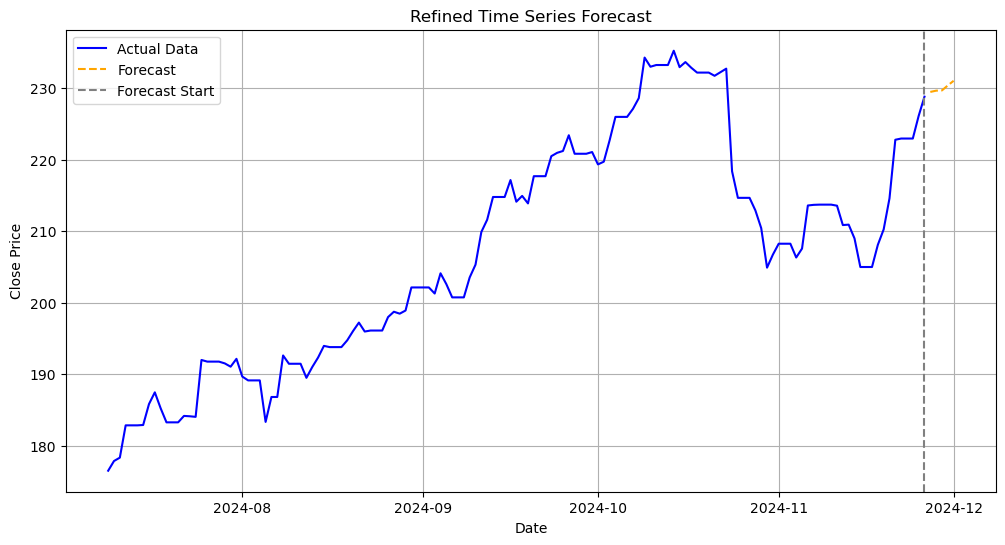

Forecasted Values:
2024-11-27    229.492718
2024-11-28    229.669822
2024-11-29    229.707418
2024-11-30    230.397949
2024-12-01    231.050505
Freq: D, Name: predicted_mean, dtype: float64


In [6]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//output//stock_data.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(data)

print(data.columns)

,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-05,175.74,176.090,173.9500,176.020,2085970,2.1400
2024-07-08,176.41,178.590,176.0100,177.640,2503038,2.5800
2024-07-09,177.60,177.700,175.5800,176.480,2513305,2.1200
2024-07-10,176.60,178.220,174.4500,177.840,3462182,3.7700
2024-07-11,177.65,179.440,176.6200,178.310,2807145,2.8200
...,...,...,...,...,...,...
2024-11-18,207.00,208.415,205.3701,208.090,3406045,3.0449
2024-11-19,206.50,210.330,206.1900,210.250,2860746,4.1400
2024-11-20,211.00,214.960,209.7725,214.600,4562901,5.1875


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [9]:
print(data.index)


DatetimeIndex(['2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-22',
               '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26',
               '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01',
               '2024-08-02', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-12', '2024-08-13',
               '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-19',
               '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23',
               '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13', '2024-09-16', '2024-09-17',
               '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-23',
      

In [10]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-21', 'Close'] = 222.80

# Use the most recent 3 months of data
train = data.loc['2024-08-01':]


In [11]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

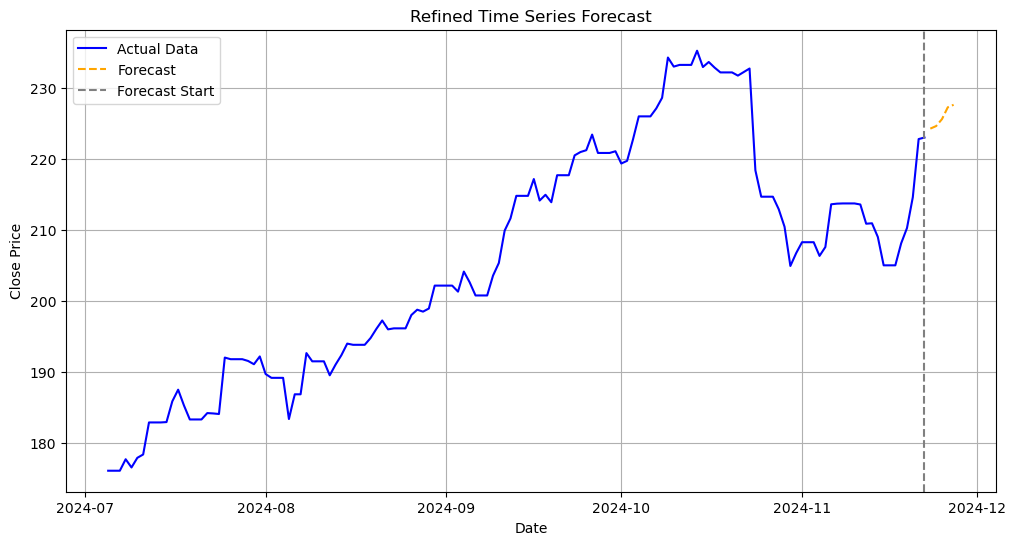

Forecasted Values:
2024-11-23    224.273408
2024-11-24    224.631475
2024-11-25    225.609446
2024-11-26    227.284646
2024-11-27    227.633745
Freq: D, Name: predicted_mean, dtype: float64


In [12]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)
